In [2]:
import numpy as np
import pandas as pd


In [3]:
from sklearn.datasets import make_regression

In [4]:
X,Y = make_regression(n_samples=4 , n_features=1 , n_informative=1 , n_targets=1 , noise=80 , random_state=13)

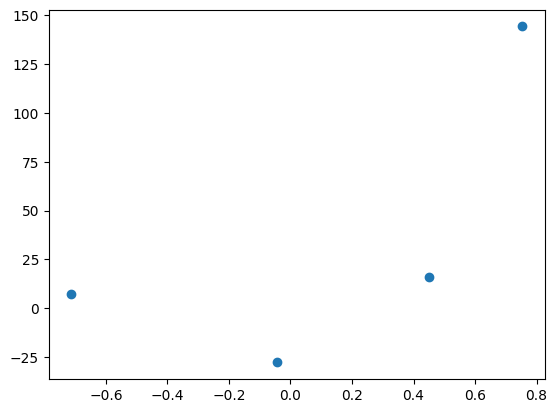

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

In [6]:
# Lets apply OLS ( Ordinary Least Square )

from sklearn.linear_model import LinearRegression

In [7]:
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [8]:
reg.coef_

array([78.35063668])

In [9]:
reg.intercept_

np.float64(26.15963284313262)

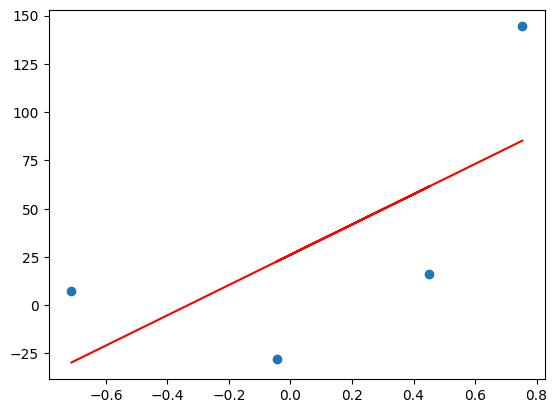

In [10]:
plt.scatter(X,Y)
plt.plot(X , reg.predict(X) , color='red')

In [11]:
# Lets apply gradient descent assuming m is constant ie 78.35
# and let say initially intercept b is 0

y_pred = ((X * 78.35) + 0).reshape(4)

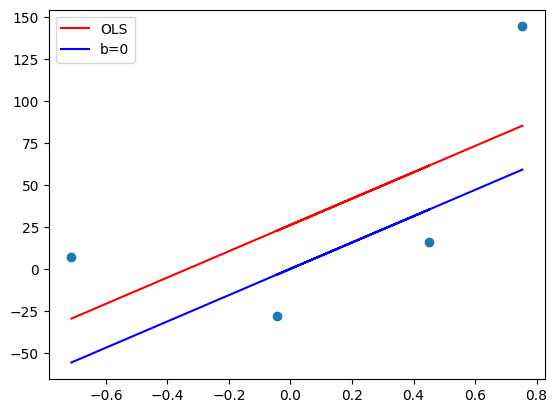

In [12]:
plt.scatter(X,Y)
plt.plot(X , reg.predict(X) , color='red' , label='OLS')
plt.plot(X , y_pred , color='blue' , label='b=0')
plt.legend()
plt.show()

In [13]:
m = 78.35
b = 0

In [14]:
loss_slope = -2 * np.sum(Y - m*X.ravel() - b)
loss_slope

np.float64(-209.27763408209216)

In [15]:
# Lets take learning rate 0.1
lr = 0.1
step_size = loss_slope*lr
step_size

np.float64(-20.927763408209216)

In [16]:
# calculating new intercept 
b -= step_size

In [17]:
b

np.float64(20.927763408209216)

In [18]:
y_pred1 = ((m*X) + b).reshape(4)

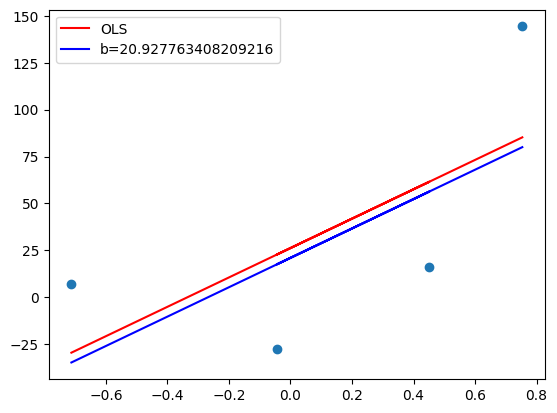

In [19]:
plt.scatter(X,Y)
plt.plot(X , reg.predict(X) , color='red' , label='OLS')
plt.plot(X , y_pred1 , color='blue' , label='b={}'.format(b))
plt.legend()
plt.show()

26.129525360899255


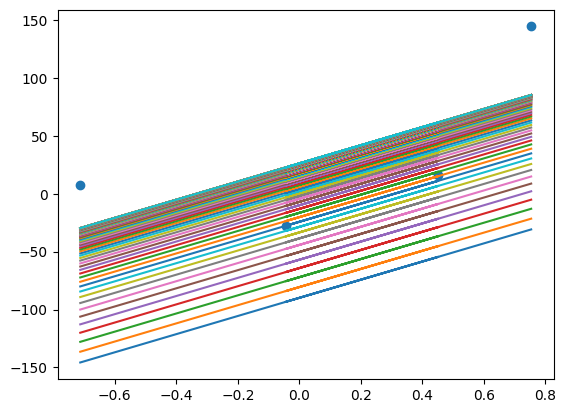

In [20]:
# Lets do this in loop and get closed to the red line

m = 78.35 
b = -100
lr = 0.01

epochs = 100

for i in range(epochs):
    loss_slope = -2 * np.sum(Y - m*X.ravel() - b)
    step_size = loss_slope*lr
    b -= step_size

    Y_pred = m * X + b
    plt.plot(X,Y_pred)


plt.scatter(X,Y)
print(b)

<h1>Gradient Descent implementation (Only for b or intercept)</h1>

In [21]:
X,Y = make_regression(n_samples=100 , n_features=1 , n_informative=1 , n_targets=1  , noise=20)

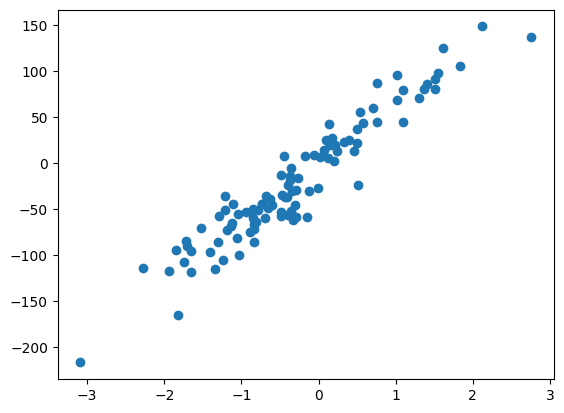

In [22]:
plt.scatter(X,Y)

In [23]:
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [24]:
reg.coef_

array([62.59170232])

In [25]:
reg.intercept_

np.float64(-2.536805046756445)

In [26]:
m = reg.coef_

In [27]:
class GDRegressor:
    def __init__(self , learning_rate , epochs):
        self.m = 45.132
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,Y):
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(Y - self.m*X.ravel() - self.b)
            step_size = loss_slope*self.lr
            self.b = self.b - step_size
        
        print(self.b)
        
    
    def predict(self,X):
        return self.m * X + self.b


In [28]:
gdr = GDRegressor(0.001 , 100)
gdr.fit(X,Y)

-7.6390676601078775


In [29]:
gdr.b

np.float64(-7.6390676601078775)

In [30]:
Y_pred = gdr.predict(X)

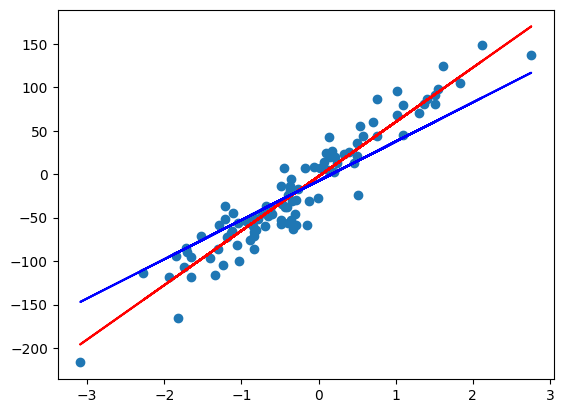

In [31]:
plt.scatter(X,Y)
plt.plot(X , reg.predict(X) , color='red')
plt.plot(X , Y_pred , color='blue')

<h1>Gradient Descent implementation for m and b</h1>

In [35]:
X,Y = make_regression(n_samples=100 , n_features=1 , n_informative=1 , n_targets=1 , noise=20 , random_state=13)

In [39]:
from sklearn.model_selection import cross_val_score

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

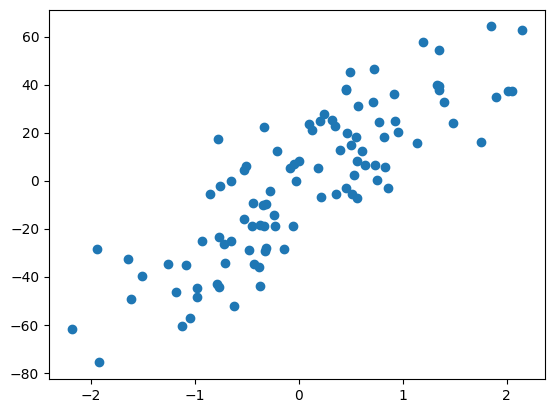

In [46]:
plt.scatter(X,Y)

In [47]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [48]:
reg.coef_ , reg.intercept_

(array([28.12597332]), np.float64(-2.2710144261783825))

In [51]:
Y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test , Y_pred)

0.6345158782661012

In [52]:
class GDRegressor:
    def __init__(self , learning_rate , epochs):
        self.m = 0
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,Y):
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(Y - self.m*X.ravel() - self.b)
            step_size = loss_slope_b*self.lr
            self.b = self.b - step_size
            loss_slope_m = -2 * np.sum((Y - self.m*X.ravel() - self.b)*X.ravel())
            step_size = loss_slope_m*self.lr
            self.m = self.m - step_size
        
        print(self.m , self.b)
        
    
    def predict(self,X):
        return self.m * X + self.b


In [53]:
gd = GDRegressor(0.001 , 100)
gd.fit(X_train,Y_train)

28.125970604219674 -2.271012941593545


In [54]:
Y_pred2 = gd.predict(X_test)
r2_score(Y_test , Y_pred2)

0.6345158894056512